<a href="https://colab.research.google.com/github/ashtonsouthwick/DSPS_ASouthwick/blob/main/HW10/Southwick_kerasmnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [4]:
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

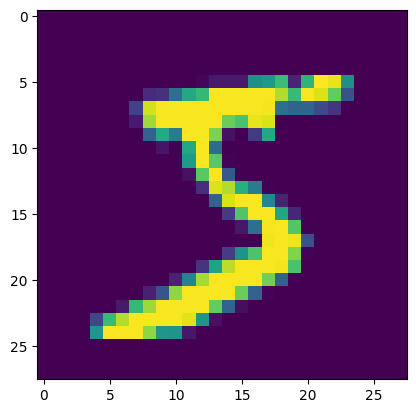

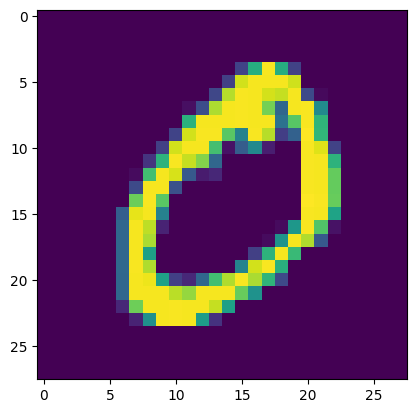

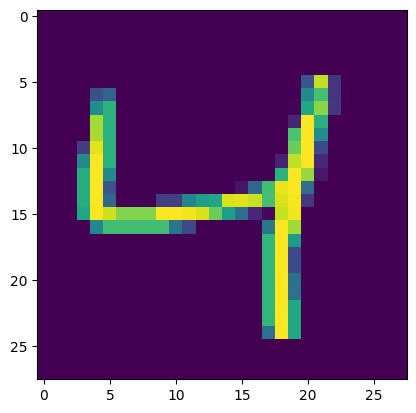

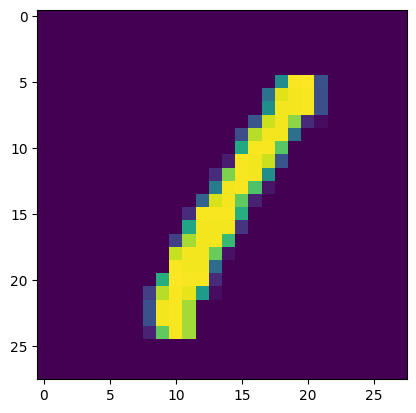

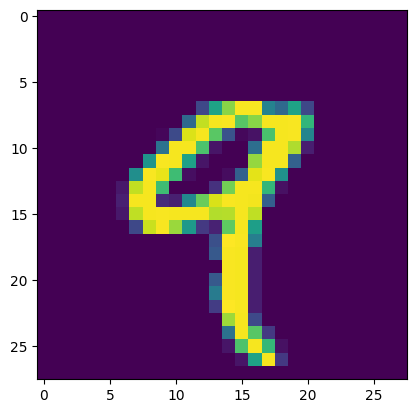

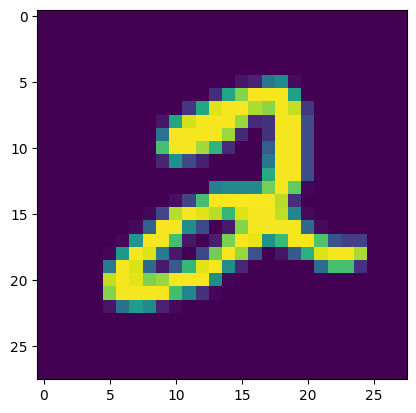

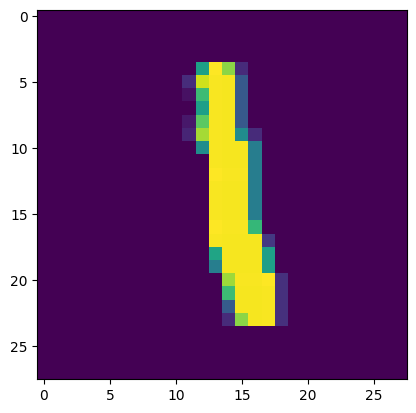

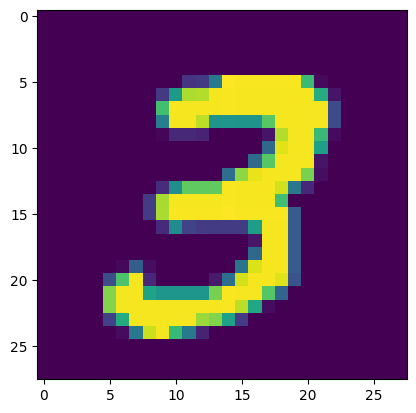

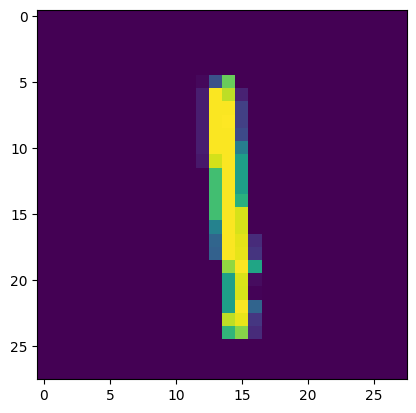

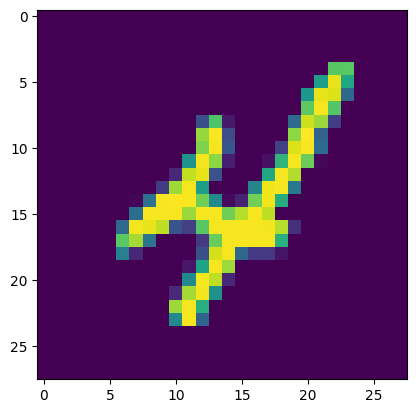

In [8]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])

In [12]:
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
x_testraveled.shape

(10000, 784)

In [15]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [16]:
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [17]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4104 - loss: 1.9231 - val_accuracy: 0.8541 - val_loss: 0.7539
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8837 - loss: 0.6217 - val_accuracy: 0.9291 - val_loss: 0.3331
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9337 - loss: 0.2968 - val_accuracy: 0.9458 - val_loss: 0.2170
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9539 - loss: 0.1902 - val_accuracy: 0.9545 - val_loss: 0.1696
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9643 - loss: 0.1403 - val_accuracy: 0.9623 - val_loss: 0.1422
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.1092 - val_accuracy: 0.9643 - val_loss: 0.1299
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9777 - loss: 0.0863 - val_accuracy: 0.9678 - val_loss: 0.1175
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9818 - loss: 0.0729 - val_accuracy: 0.

In [19]:
history.history

{'accuracy': [0.6134222149848938,
  0.9038888812065125,
  0.9393333196640015,
  0.9551555514335632,
  0.9649555683135986,
  0.9728444218635559,
  0.9775333404541016,
  0.9822888970375061,
  0.9856888651847839,
  0.9886000156402588],
 'loss': [1.4667484760284424,
  0.5070650577545166,
  0.26313090324401855,
  0.17911195755004883,
  0.135141059756279,
  0.10649275034666061,
  0.08578168600797653,
  0.0691758394241333,
  0.05638417601585388,
  0.046161964535713196],
 'val_accuracy': [0.8541333079338074,
  0.9290666580200195,
  0.9458000063896179,
  0.9545333385467529,
  0.9623333215713501,
  0.9642666578292847,
  0.9678000211715698,
  0.9689333438873291,
  0.9713333249092102,
  0.97079998254776],
 'val_loss': [0.7538843750953674,
  0.333065003156662,
  0.21698468923568726,
  0.16957619786262512,
  0.1422245055437088,
  0.12985859811306,
  0.11754091084003448,
  0.11216337978839874,
  0.10517586767673492,
  0.10242332518100739]}

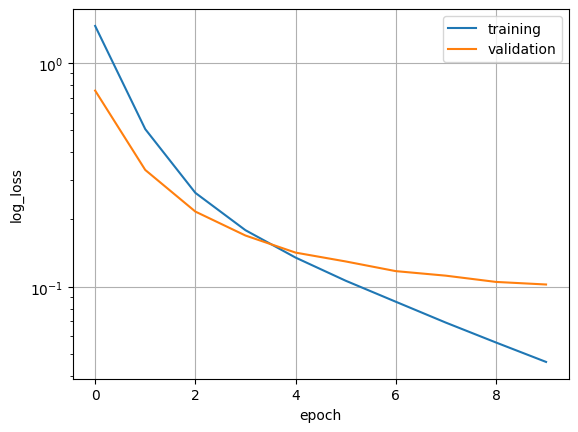

In [20]:
plt.plot(history.history['loss'], label="training")
plt.plot(history.history['val_loss'], label="validation")
plt.xlabel("epoch")
plt.ylabel("log_loss")
plt.legend()
plt.grid()
plt.yscale('log')

Figure 1:

Loss over epochs for training and validation set of neural network using keras.

The training set decays towards zero. The validation set decays towards zero as well, but slower than the training set. It also seems to start to plateau towards the end. This difference towards the end indicates that the model begins to learn the training data too well, and fails to generalize the unseen data.

In [30]:
mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.1017


[0.09058734774589539, 0.9735999703407288]

In [23]:
input_shape = (28,28,1)

model = Sequential((
    Input(shape=input_shape),
    Conv2D(32, kernel_size=(10, 10), activation="relu"),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = model.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8106 - loss: 0.6154 - val_accuracy: 0.9661 - val_loss: 0.1140
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9716 - loss: 0.0920 - val_accuracy: 0.9742 - val_loss: 0.0825
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9803 - loss: 0.0613 - val_accuracy: 0.9817 - val_loss: 0.0617
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9862 - loss: 0.0434 - val_accuracy: 0.9819 - val_loss: 0.0635
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9876 - loss: 0.0380 - val_accuracy: 0.9857 - val_loss: 0.0483
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9908 - loss: 0.0294 - val_accuracy: 0.9855 - val_loss: 0.0489
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9913 - loss: 0.0272 - val_accuracy: 0.9860 - val_loss: 0.0489
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9916 - loss: 0.0257 - val_accuracy: 0.

In [29]:
x_test = x_test.reshape(-1, 28, 28, 1)
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9884 - loss: 0.0335


[0.02812332846224308, 0.9904999732971191]

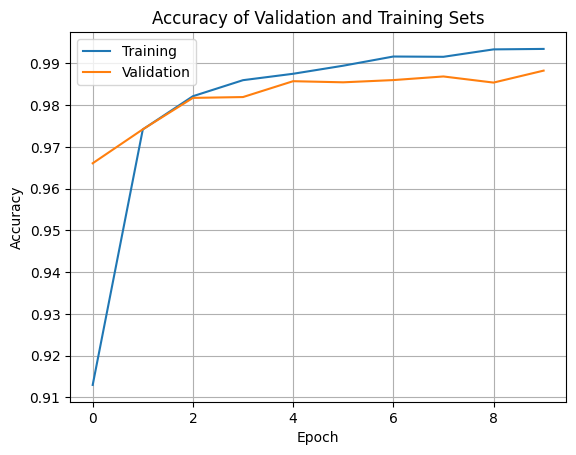

In [24]:
plt.plot(cnn_history.history['accuracy'], label="Training")
plt.plot(cnn_history.history['val_accuracy'], label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy of Validation and Training Sets")
plt.grid()
plt.legend()

Figure 2:

Accuracy of validation and training sets of convolutional neural network using Conv2D, MaxPooling2D, and Dense deep learning model techniques, with relu activation functions, and softmax for the final layer. The training set instantly shoots up at the first epoch, then starts to slowly increase towards 100% accuracy. The validation set seems to plateau early on, but both the validation and training sets have high and similar accuracies, indicating a good fit.

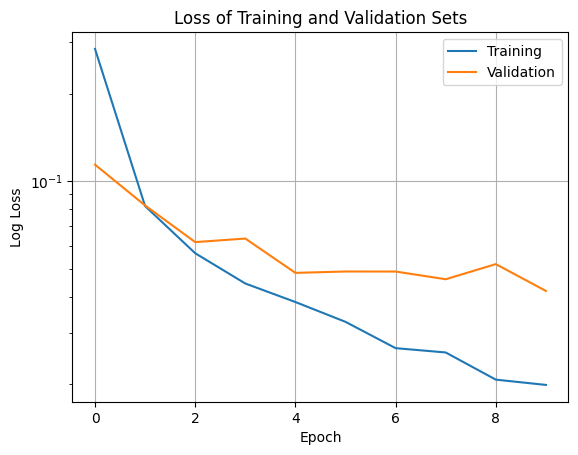

In [25]:
plt.plot(cnn_history.history['loss'], label="Training")
plt.plot(cnn_history.history['val_loss'], label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Loss of Training and Validation Sets")
plt.grid()
plt.legend()
plt.yscale('log')

Figure 3: Log loss over epochs for training and validation sets for the same convolutional neural network as Figure 2. The training set rapidly decays at the first epoch, then starts to decay slower towards zero. The validation set starts off by slowly decaying towards zero, but then after the 6th epoch it begins to increase, indicating overfitting.

# Comparisons

In [33]:
mlp_loss, mlp_acc = mlp.evaluate(x_testraveled, y_test)
cnn_loss, cnn_acc = model.evaluate(x_test, y_test)

print(f"MLP Loss: {mlp_loss:.4f}, MLP Accuracy: {mlp_acc:.4f}")
print(f"CNN Loss: {cnn_loss:.4f}, CNN Accuracy: {cnn_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.1017
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9884 - loss: 0.0335
MLP Loss: 0.0906, MLP Accuracy: 0.9736
CNN Loss: 0.0281, CNN Accuracy: 0.9905


The CNN outperforms the MLP pretty well. With a CNN loss being much less than the MLP loss (0.0281 vs 0.0906), and CNN accuracy being greater than the MLP accuracy (0.9905 vs 0.9736), this tells me that CNN's are better than MLP's for image tasks. This is likely due to the CNN being able to see patterns, textures, shapes, etc. in an image while the MLP flattens the image out and loses spatial information